In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from math import exp
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

In [2]:
db1= pd.read_csv('ModelDate 2.csv')
db1

,Unnamed: 0,loan_id,Borrower_id,user_id,Bank,Product,Status,Housing_Type,Monthly_Income,Gender,...,qavg_netmobile_banking_debit,qavg_online_credit,qavg_online_debit,qavg_other,qavg_other_charges,qavg_other_penalty_charges,qavg_pos_credit,qavg_pos_debit,qavg_sms_charges,qavg_transaction_reversal
0,0,3204,B-99996,5e62375094e84205302f1a22,YES BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,19000.00000,MALE,...,940.002533,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,1,3217,B-99972,5e6219a994e842665156cfb2,BANK OF BARODA,Mumbai,FINAL LOAN OFFER ACCEPTED,OWNED,37000.00000,MALE,...,4374.169492,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,2,3236,B-99935,5e61f8a194e8426a6433f1e2,CITIZEN CREDIT COOPERATIVE BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,20000.00000,FEMALE,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,147.454,0.0,0.0
3,3,3210,B-99887,5e61212f94e84276465275e2,BANK OF INDIA,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,41666.66667,MALE,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
4,4,3241,B-99839,5e60cf2594e84258ae6115f2,ICICI BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,RENTAL,19500.00000,FEMALE,...,1258.495185,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,3368,607,B-10011,5c7ea35594e842179058ec12,IDBI BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,16000.00000,MALE,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3369,3369,3337,B-100050,5e627f0394e8425911196d08,KOTAK MAHINDRA BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,12000.00000,FEMALE,...,2130.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0
3370,3370,3269,B-100028,5e625ae994e8422eeb57bb52,PUNJAB AND SIND BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,RENTAL,15000.00000,FEMALE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3371,3371,3196,B-100012,5e62474794e8420b94349502,CORPORATION BANK,Chennai,APPLICATION INCOMPLETE,OWNED,18000.00000,FEMALE,...,1469.722222,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0


In [3]:
db2=pd.read_csv('Collection_MIS_Data_November.csv',encoding='cp1252')
db2.columns


Index(['offer_loan_id', 'loan_id', 'Borrower Name', 'Contact', 'Tenure',
       'Loan Amount', 'EMI Amount before Moratorium', 'Grade Name',
       'Disbursement Date', 'EMI Date', 'Total Outstanding Principal',
       'Total Outstanding EMI', 'Overdue Emi Amount',
       'Cheque Bounce Charge Remain', 'Late Charge Amount Remain',
       'Collection Charge Remain', 'Cash Pick Up Charge Remain',
       'Remaining Charges', 'Overdue Principal Amount',
       'Total Current Outstanding', 'DPD', 'Current Month Bucket',
       'Last EMI Paid Date', 'Last Emi Paid Amount',
       'EMI Paid in Current Month', 'Total Amount Paid',
       'Current Month EMI Paid', 'EMI Due Count', 'Last Month Bucket',
       'First EMI Unpaid Date', 'Advance Paymnet Indicator',
       'Charge Triggered in Current Month', 'Waiver Amount',
       'Bounce Indicator', 'Current Month Payment Indicator', 'WIP Indicator',
       'Company Add', 'Current Add', 'Moratorium', 'Payment before bounce',
       'Payment after

In [5]:
New_Npa = pd.merge(db1,db2,on='loan_id',how='left') 
New_Npa


,Unnamed: 0,loan_id,Borrower_id,user_id,Bank,Product,Status,Housing_Type,Monthly_Income,Gender,...,Current Month Any Payment Indicator,Overdue EMI till begining of month,Last_EMI_Date,First_EMI_unpaid_Month_Code,Current_Month_Code,loan_status,Current Month Bucket count,Last Month Bucket count,Tanure Completed,New_Npa_Flag
0,0,3204,B-99996,5e62375094e84205302f1a22,YES BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,19000.00000,MALE,...,NaN,0.23,01-04-2021,NaN,264,CLOSED,1,1,1,1
1,1,3217,B-99972,5e6219a994e842665156cfb2,BANK OF BARODA,Mumbai,FINAL LOAN OFFER ACCEPTED,OWNED,37000.00000,MALE,...,NaN,66462.00,10-02-2023,253.0,264,FUNDED,12,1,0,1
2,2,3236,B-99935,5e61f8a194e8426a6433f1e2,CITIZEN CREDIT COOPERATIVE BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,20000.00000,FEMALE,...,NaN,24210.00,01-11-2021,254.0,264,FUNDED,12,1,1,1
3,3,3210,B-99887,5e61212f94e84276465275e2,BANK OF INDIA,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,41666.66667,MALE,...,NaN,94695.00,05-02-2023,249.0,264,FUNDED,14,1,0,1
4,4,3241,B-99839,5e60cf2594e84258ae6115f2,ICICI BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,RENTAL,19500.00000,FEMALE,...,NaN,49994.00,01-02-2022,250.0,264,FUNDED,14,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3617,3368,607,B-10011,5c7ea35594e842179058ec12,IDBI BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,16000.00000,MALE,...,NaN,60048.00,01-09-2021,250.0,264,FUNDED,14,3,1,1
3618,3369,3337,B-100050,5e627f0394e8425911196d08,KOTAK MAHINDRA BANK LIMITED,Mumbai,FINAL LOAN OFFER ACCEPTED,PARENTAL,12000.00000,FEMALE,...,NaN,15387.00,10-07-2021,256.0,264,FUNDED,9,1,1,1
3619,3370,3269,B-100028,5e625ae994e8422eeb57bb52,PUNJAB AND SIND BANK,Mumbai,FINAL LOAN OFFER ACCEPTED,RENTAL,15000.00000,FEMALE,...,NaN,22616.00,15-08-2021,253.0,264,FUNDED,12,1,1,1
3620,3371,3196,B-100012,5e62474794e8420b94349502,CORPORATION BANK,Chennai,APPLICATION INCOMPLETE,OWNED,18000.00000,FEMALE,...,NaN,72120.00,10-08-2022,249.0,264,FUNDED,14,1,0,1


In [22]:
#New_Npa.to_csv ('C:\Fatak Pay\left_merge_npa.csv', index = False, header=True)

In [ ]:
#New_Npa
#'Age2','Monthly_Income','work experience','MOB','loan_amount','funded_emi_amount','CIBIL Score','TotalBalanceAmount'

In [79]:
df=pd.read_csv('C:\Fatak Pay\Book1.csv',encoding='cp1252')
df

,Monthly_Income,Age2,qc_atm_debit,qavg_credit,qavg_debit,qo_avg_balance,qo_avg_balance_average,qo_avg_balance_weighted_average,qo_max_balance,qo_min_balance,qc_credit,qc_debit,NPA_flag
0,22000.00000,43,14,5506.103529,1877.988491,157909.26,79570.23,78339.03,118099.78,22760.64,17,53,0
1,16666.66667,32,27,14990.500000,1912.333333,45530.97,25575.09,19955.88,64305.00,2423.00,4,36,0
2,16667.00000,33,18,11711.166670,3295.909091,31169.51,20395.69,10773.82,65479.00,1267.00,6,22,0
3,22950.00000,39,30,10540.500000,1920.794444,62639.61,33625.25,29014.36,79710.60,6546.60,6,36,1
4,18500.00000,25,14,5964.500000,1142.407826,0.00,0.00,0.00,0.00,0.00,6,46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,27500.00000,30,1,6080.000000,4170.518182,8240.08,5945.65,2294.43,38358.71,1191.71,8,11,0
761,27500.00000,30,1,6080.000000,4170.518182,8240.08,5945.65,2294.43,38358.71,1191.71,8,11,1
762,21188.00000,25,21,3223.311154,657.295875,36030.79,18342.54,17688.25,69942.28,2156.42,50,200,1
763,12000.00000,23,8,7582.000000,2640.115625,93015.21,48417.76,44597.45,81941.40,35503.60,13,32,0


In [32]:
 def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(df)


,Monthly_Income,Age2,CIBIL Score,NoOfAccounts,NoOfActiveAccounts,TotalPastDue,SingleHighestCredit,SingleHighestSanctionAmount,TotalHighCredit,AverageOpenBalance,...,qc_credit,qc_debit,qo_avg_balance,qo_avg_balance_average,qo_avg_balance_weighted_average,qo_max_balance,qo_min_balance,qavg_credit,qavg_debit,NPA_flag
0,19000.00000,26.0,755.0,28.0,8.0,0.0,18623.0,38500.0,18623.0,5927.88,...,51.0,100.0,6495.93,4053.51,2442.42,38250.77,119.32,2471.420392,1315.644800,0.0
1,37000.00000,31.0,609.0,12.0,8.0,0.0,0.0,54000.0,0.0,970.13,...,37.0,132.0,76957.67,36226.16,40731.51,184357.33,60.70,14201.019190,4023.542424,1.0
2,20000.00000,29.0,755.0,5.0,5.0,0.0,0.0,21500.0,0.0,5670.40,...,11.0,39.0,25178.80,15537.50,9641.30,47746.87,95.94,4350.431818,1588.670769,1.0
3,41666.66667,44.0,741.0,3.0,2.0,0.0,0.0,59500.0,0.0,4580.00,...,12.0,51.0,82491.04,47474.88,35016.16,179800.85,2761.49,18796.562500,4318.498824,1.0
4,19500.00000,25.0,625.0,6.0,2.0,980.0,23082.0,8000.0,23082.0,13724.00,...,44.0,105.0,17180.91,8792.87,8388.04,68347.95,0.00,3598.734773,1614.073524,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,30042.00000,23.0,718.0,13.0,3.0,0.0,42315.0,20129.0,42315.0,19167.00,...,15.0,48.0,24801.45,9411.05,15390.40,75830.45,0.45,5349.194667,1663.632292,1.0
578,17518.00000,39.0,719.0,8.0,5.0,0.0,26374.0,76235.0,39890.0,29698.20,...,46.0,62.0,6739.27,6567.55,171.72,36031.00,0.00,3066.644783,2242.981452,0.0
579,17518.00000,39.0,719.0,8.0,5.0,0.0,26374.0,76235.0,39890.0,29698.20,...,46.0,62.0,6739.27,6567.55,171.72,36031.00,0.00,3066.644783,2242.981452,1.0
580,24800.00000,32.0,747.0,4.0,1.0,0.0,35076.0,0.0,35076.0,35075.00,...,13.0,99.0,88445.90,46278.99,42166.91,109990.52,16912.64,7910.153846,1057.246263,0.0


In [35]:
X = df.values[:, 0:23]
Y =df.values[:, 23]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=14)

In [36]:
 clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 30,max_depth=3, min_samples_leaf=5)

In [37]:
clf_gini.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=30)

In [38]:
 y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
print("Confusion Matrix: ",
        confusion_matrix(Y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(Y_test,y_pred)*100)
      
print("Report : ",
    classification_report(Y_test, y_pred))

Confusion Matrix:  [[77  5]
 [30  5]]
Accuracy :  70.08547008547008
Report :                precision    recall  f1-score   support

         0.0       0.72      0.94      0.81        82
         1.0       0.50      0.14      0.22        35

    accuracy                           0.70       117
   macro avg       0.61      0.54      0.52       117
weighted avg       0.65      0.70      0.64       117



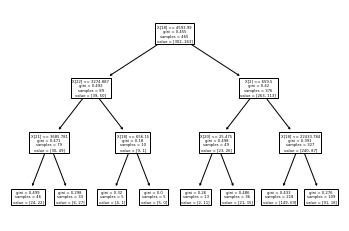

In [40]:
tree.plot_tree(clf_gini);

In [93]:
fig = plt.figure(figsize=(25,20))
fig

<Figure size 1800x1440 with 0 Axes>

<Figure size 1800x1440 with 0 Axes>

In [94]:
fig.savefig("decistion_tree.png")

In [15]:
dfc=pd.read_csv('C:\Fatak Pay\Extra\ModelDate 2_Prod_hit_nonull.csv',encoding='cp1252')

In [16]:
s = (dfc.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['NoOfActiveAccounts']


In [33]:
label_X_train = dfc.copy()
label_X_valid = dfc.copy()

ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(dfc[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(dfc[object_cols])
label_X_valid

,Housing_Type,Gender,employment_status,highest_education,Marital_status,MostSevereStatusWithIn24Months,NPA_flag
0,3.0,1.0,0.0,5.0,2.0,8.0,0
1,2.0,1.0,0.0,5.0,0.0,5.0,1
2,3.0,0.0,0.0,7.0,2.0,8.0,1
3,3.0,1.0,1.0,5.0,0.0,8.0,1
4,4.0,0.0,0.0,9.0,2.0,1.0,1
...,...,...,...,...,...,...,...
664,3.0,0.0,0.0,9.0,0.0,8.0,0
665,2.0,1.0,0.0,0.0,0.0,8.0,1
666,4.0,1.0,0.0,9.0,2.0,8.0,0
667,4.0,0.0,0.0,0.0,0.0,8.0,1


In [38]:
X = label_X_train.values[:, 0:6]
Y =label_X_train.values[:, 6]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.8, random_state=14)
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 30,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [39]:
print("Confusion Matrix: ",
        confusion_matrix(Y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(Y_test,y_pred)*100)
      
print("Report : ",
    classification_report(Y_test, y_pred))

Confusion Matrix:  [[336  15]
 [171  14]]
Accuracy :  65.29850746268657
Report :                precision    recall  f1-score   support

         0.0       0.66      0.96      0.78       351
         1.0       0.48      0.08      0.13       185

    accuracy                           0.65       536
   macro avg       0.57      0.52      0.46       536
weighted avg       0.60      0.65      0.56       536



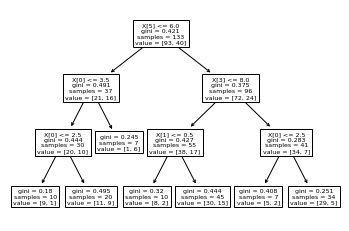

In [40]:
tree.plot_tree(clf_gini);

In [41]:
label_X_valid.to_csv ('C:\Fatak Pay\converted.csv', index = False, header=True)

In [42]:
dfcnc=pd.read_csv('C:\Fatak Pay\cat_and_cont_hit_nonull.csv',encoding='cp1252')
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dfcnc)

,Housing_Type,Gender,employment_status,highest_education,Marital_status,MostSevereStatusWithIn24Months,Monthly_Income,work experience,Age2,loan_amount,...,qavg_cheque_debit,qavg_credit,qavg_debit,qavg_debit_card_swipe,qavg_fees,qavg_fees_name_of_fees,qavg_netmobile_banking_credit,qavg_netmobile_banking_debit,qavg_pos_debit,NPA_flag
0,3.0,1.0,0.0,5.0,2.0,8.0,19000.0,6.0,26.0,40000.0,...,0.0,2471.420392,1315.644800,1660.000000,29.500000,29.500000,1480.079744,940.002533,0.000000,0.0
1,2.0,1.0,0.0,5.0,0.0,5.0,37000.0,10.0,31.0,125000.0,...,0.0,14201.019190,4023.542424,332.142857,177.000000,177.000000,15574.428570,4374.169492,0.000000,1.0
2,3.0,0.0,0.0,7.0,2.0,8.0,20000.0,6.0,29.0,35000.0,...,0.0,4350.431818,1588.670769,0.000000,6.686667,6.686667,0.000000,0.000000,147.454000,1.0
4,4.0,0.0,0.0,9.0,2.0,1.0,19500.0,3.0,25.0,45000.0,...,0.0,3598.734773,1614.073524,1457.635000,0.000000,0.000000,2208.625000,1258.495185,0.000000,1.0
5,2.0,1.0,0.0,9.0,2.0,8.0,16000.0,4.0,26.0,35000.0,...,0.0,3866.208462,1235.859248,0.000000,15.056250,15.056250,2000.000000,1216.666667,714.674894,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,2.0,1.0,0.0,0.0,0.0,8.0,17518.0,14.0,39.0,55000.0,...,0.0,3066.644783,2242.981452,0.000000,136.822222,136.822222,1654.000000,1350.000000,0.000000,0.0
662,2.0,1.0,0.0,0.0,0.0,8.0,17518.0,14.0,39.0,40000.0,...,0.0,3066.644783,2242.981452,0.000000,136.822222,136.822222,1654.000000,1350.000000,0.000000,1.0
663,2.0,1.0,0.0,0.0,0.0,11.0,23000.0,30.0,54.0,75000.0,...,1000.0,10933.375000,3680.214583,0.000000,10.075000,10.075000,0.000000,0.000000,400.000000,1.0
664,3.0,0.0,0.0,9.0,0.0,8.0,24800.0,6.0,32.0,100000.0,...,0.0,7910.153846,1057.246263,0.000000,11.800000,11.800000,757.600000,3000.000000,0.000000,0.0


In [48]:
X = dfcnc.values[:, 0:78]
Y =dfcnc.values[:, 78]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=74)
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 30,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, Y_train)
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [49]:
print("Confusion Matrix: ",
        confusion_matrix(Y_test, y_pred))
      
print ("Accuracy : ",
    accuracy_score(Y_test,y_pred)*100)
      
print("Report : ",
    classification_report(Y_test, y_pred))

Confusion Matrix:  [[118  10]
 [ 54   6]]
Accuracy :  65.95744680851064
Report :                precision    recall  f1-score   support

         0.0       0.69      0.92      0.79       128
         1.0       0.38      0.10      0.16        60

    accuracy                           0.66       188
   macro avg       0.53      0.51      0.47       188
weighted avg       0.59      0.66      0.59       188



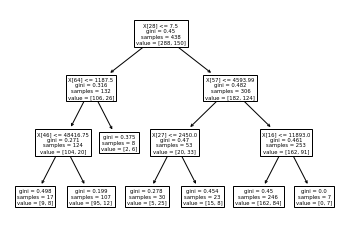

In [50]:
tree.plot_tree(clf_gini);

In [ ]:

df['qo_avg_balance_weighted_average'].describe(percentiles=[.2, .4, .6,.8,1])

In [52]:


df=pd.read_csv('C:\Fatak Pay\Book1.csv')
df

,Monthly_Income,Age2,NPA_flag,qc_atm_debit,qc_credit,qc_debit,qo_avg_balance,qo_avg_balance_average,qo_avg_balance_weighted_average,qo_max_balance,qo_min_balance,qavg_credit,qavg_debit
0,22950.0,39.0,1.0,30.0,6.0,36.0,62639.61,33625.25,29014.36,79710.60,6546.60,10540.500000,1920.794444
1,19000.0,39.0,1.0,16.0,31.0,59.0,36084.79,22325.62,13759.17,94052.13,431.90,4943.499677,2614.822034
2,23200.0,22.0,1.0,20.0,3.0,28.0,37731.21,20289.97,17441.24,72335.57,3752.57,22966.666670,2694.857143
3,19000.0,40.0,1.0,31.0,10.0,44.0,54497.00,29407.99,25089.01,65320.69,373.65,6126.832000,1392.067500
4,20000.0,32.0,1.0,15.0,4.0,25.0,20464.17,16192.90,4271.27,61215.25,111.42,15293.500000,2444.153200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:

col_imp = [ 'NoOfPastDueAccounts','NoOfZeroBalanceAccounts','qo_avg_balance_weighted_average','Monthly_Income','Age2']


In [24]:
# X = df.values[:, 0:11]
X = df[col_imp]
y = df['NPA_flag']
# X = df.values[:, 15:23]
# y =df.values[:, 23]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [26]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [27]:
print("Accuracy:",accuracy_score(y_test, y_pred))



Accuracy: 0.6914285714285714


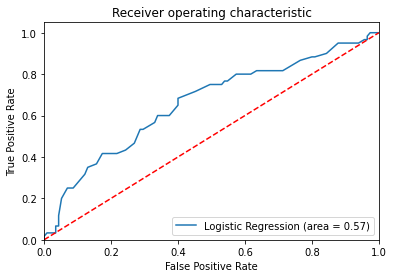

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [29]:
def normalize(X):
    return X - X.mean()
    print 

def predict(X, b0, b1):
    return np.array([1 / (1 + exp((-1*b0) + (-1*b1*float(x)))) for x in X])
def logistic_regression(X, Y):

    X = normalize(X)
    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [30]:
# X1 = df[col_imp]
# y1 = df['NPA_flag']
# b0, b1 = logistic_regression(X1, y1)
# X_test_norm = normalize(X1)
# y_pred = predict(X_test_norm, b0, b1)
# y_pred

In [31]:
y_pred=logreg.predict_proba(X)
coef=logreg.coef_[0]

In [32]:
y_pred

array([[0.64712429, 0.35287571],
       [0.78985281, 0.21014719],
       [0.59836735, 0.40163265],
       ...,
       [0.49804655, 0.50195345],
       [0.69128948, 0.30871052],
       [0.5323863 , 0.4676137 ]])

In [33]:
impcol = ['Probability-yes','Probability-No']


In [34]:
df[impcol] = y_pred

In [35]:
coef

array([-1.22839259, -0.38279611, -0.81619807, -1.28519024, -0.85302262])

In [117]:
'NoOfPastDueAccounts','NoOfZeroBalanceAccounts','qo_avg_balance_weighted_average','Monthly_Income','Age2'

In [36]:
score =     (-0.81619807)*df['qo_avg_balance_weighted_average'] - 1.22839259*df['NoOfPastDueAccounts']-0.38279611*df['NoOfZeroBalanceAccounts']-1.28519024*df['Monthly_Income']-0.85302262*df['Age2'] + 2

In [38]:
score


0      2.012135
1      1.294519
2      2.219890
3      1.650131
4      1.832851
         ...   
577    1.420368
578    2.626371
579    2.626371
580    1.812403
581    2.488831
Length: 582, dtype: float64

In [39]:
df['score']=score

In [40]:
df.to_csv ('C:\Fatak Pay\Book2.csv', index = False, header=True)


In [41]:
df=pd.read_csv('C:\Fatak Pay\Book2.csv')
df['score'].describe(percentiles=[.2, .4, .6,.8,1])

count    582.000000
mean       1.965664
std        0.492630
min        1.035894
20%        1.650131
40%        1.818572
50%        1.941558
60%        1.978805
80%        2.246804
100%       4.389689
max        4.389689
Name: score, dtype: float64

In [66]:
df=pd.read_csv('C:\Fatak Pay\Book1.csv')


In [62]:
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 



# def iv_woe(data, target, bins=10, show_woe=False):
    
#     #Empty Dataframe
#     newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
#     #Extract Column Names
#     cols = data.columns
    
#     #Run WOE and IV on all the independent variables
#     for ivars in cols[~cols.isin([target])]:
#         if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
#             binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
#             d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
#         else:
#             d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
#         # Calculate the number of events in each group (bin)
#         d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
#         d.columns = ['Cutoff', 'N', 'Events']
        
#         # Calculate % of events in each group.
#         d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

#         # Calculate the non events in each group.
#         d['Non-Events'] = d['N'] - d['Events']
#         # Calculate % of non events in each group.
#         d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

#         # Calculate WOE by taking natural log of division of % of non-events and % of events
#         d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
#         d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
#         d.insert(loc=0, column='Variable', value=ivars)
#         print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
#         temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
#         newDF=pd.concat([newDF,temp], axis=0)
#         woeDF=pd.concat([woeDF,d], axis=0)

#         #Show WOE Table
#         if show_woe == True:
#             print(d)
#     return newDF, woeDF
import pandas as pd, numpy as np, os, re, math, time

# to check monotonicity of a series
def is_monotonic(temp_series):
    return all(temp_series[i] <= temp_series[i + 1] for i in range(len(temp_series) - 1)) or all(temp_series[i] >= temp_series[i + 1] for i in range(len(temp_series) - 1))

def prepare_bins(bin_data, c_i, target_col, max_bins):
    force_bin = True
    binned = False
    remarks = np.nan
    # ----------------- Monotonic binning -----------------
    for n_bins in range(max_bins, 2, -1):
        try:
            bin_data[c_i + "_bins"] = pd.qcut(bin_data[c_i], n_bins, duplicates="drop")
            monotonic_series = bin_data.groupby(c_i + "_bins")[target_col].mean().reset_index(drop=True)
            if is_monotonic(monotonic_series):
                force_bin = False
                binned = True
                remarks = "binned monotonically"
                break
        except:
            pass
    # ----------------- Force binning -----------------
    # creating 2 bins forcefully because 2 bins will always be monotonic
    if force_bin or (c_i + "_bins" in bin_data and bin_data[c_i + "_bins"].nunique() < 2):
        _min=bin_data[c_i].min()
        _mean=bin_data[c_i].mean()
        _max=bin_data[c_i].max()
        bin_data[c_i + "_bins"] = pd.cut(bin_data[c_i], [_min, _mean, _max], include_lowest=True)
        if bin_data[c_i + "_bins"].nunique() == 2:
            binned = True
            remarks = "binned forcefully"
    
    if binned:
        return c_i + "_bins", remarks, bin_data[[c_i, c_i+"_bins", target_col]].copy()
    else:
        remarks = "couldn't bin"
        return c_i, remarks, bin_data[[c_i, target_col]].copy()

# calculate WOE and IV for every group/bin/class for a provided feature
def iv_woe_4iter(binned_data, target_col, class_col):
    if "_bins" in class_col:
        binned_data[class_col] = binned_data[class_col].cat.add_categories(['Missing'])
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col.replace("_bins", ""):["min", "max"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()
    else:
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col:["first", "first"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()
    
    temp_groupby.columns = ["sample_class", "min_value", "max_value", "sample_count", "event_count", "event_rate"]
    temp_groupby["non_event_count"] = temp_groupby["sample_count"] - temp_groupby["event_count"]
    temp_groupby["non_event_rate"] = 1 - temp_groupby["event_rate"]
    temp_groupby = temp_groupby[["sample_class", "min_value", "max_value", "sample_count",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
    if "_bins" not in class_col and "Missing" in temp_groupby["min_value"]:
        temp_groupby["min_value"] = temp_groupby["min_value"].replace({"Missing": np.nan})
        temp_groupby["max_value"] = temp_groupby["max_value"].replace({"Missing": np.nan})
    temp_groupby["feature"] = class_col
    if "_bins" in class_col:
        temp_groupby["sample_class_label"]=temp_groupby["sample_class"].replace({"Missing": np.nan}).astype('category').cat.codes.replace({-1: np.nan})
    else:
        temp_groupby["sample_class_label"]=np.nan
    temp_groupby = temp_groupby[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]
    
    """
    **********get distribution of good and bad
    """
    temp_groupby['distbn_non_event'] = temp_groupby["non_event_count"]/temp_groupby["non_event_count"].sum()
    temp_groupby['distbn_event'] = temp_groupby["event_count"]/temp_groupby["event_count"].sum()

    temp_groupby['woe'] = np.log(temp_groupby['distbn_non_event'] / temp_groupby['distbn_event'])
    temp_groupby['iv'] = (temp_groupby['distbn_non_event'] - temp_groupby['distbn_event']) * temp_groupby['woe']
    
    temp_groupby["woe"] = temp_groupby["woe"].replace([np.inf,-np.inf],0)
    temp_groupby["iv"] = temp_groupby["iv"].replace([np.inf,-np.inf],0)
    
    return temp_groupby

"""
- iterate over all features.
- calculate WOE & IV for there classes.
- append to one DataFrame woe_iv.
"""
def var_iter(data, target_col, max_bins):
    woe_iv = pd.DataFrame()
    remarks_list = []
    for c_i in data.columns:
        if c_i not in [target_col]:
            # check if binning is required. if yes, then prepare bins and calculate woe and iv.
            """
            ----logic---
            binning is done only when feature is continuous and non-binary.
            Note: Make sure dtype of continuous columns in dataframe is not object.
            """
            c_i_start_time=time.time()
            if np.issubdtype(data[c_i], np.number) and data[c_i].nunique() > 2:
                class_col, remarks, binned_data = prepare_bins(data[[c_i, target_col]].copy(), c_i, target_col, max_bins)
                agg_data = iv_woe_4iter(binned_data.copy(), target_col, class_col)
                remarks_list.append({"feature": c_i, "remarks": remarks})
            else:
                agg_data = iv_woe_4iter(data[[c_i, target_col]].copy(), target_col, c_i)
                remarks_list.append({"feature": c_i, "remarks": "categorical"})
            # print("---{} seconds. c_i: {}----".format(round(time.time() - c_i_start_time, 2), c_i))
            woe_iv = woe_iv.append(agg_data)
    return woe_iv, pd.DataFrame(remarks_list)

# after getting woe and iv for all classes of features calculate aggregated IV values for features.
def get_iv_woe(data, target_col, max_bins):
    func_start_time = time.time()
    woe_iv, binning_remarks = var_iter(data, target_col, max_bins)
    print("------------------IV and WOE calculated for individual groups.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
    woe_iv["feature"] = woe_iv["feature"].replace("_bins", "", regex=True)    
    woe_iv = woe_iv[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                     "non_event_count", "non_event_rate", "event_count", "event_rate", 'distbn_non_event',
                     'distbn_event', 'woe', 'iv']]
    
    iv = woe_iv.groupby("feature")[["iv"]].agg(["sum", "count"]).reset_index()
    print("------------------Aggregated IV values for features calculated.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    
    iv.columns = ["feature", "iv", "number_of_classes"]
    null_percent_data=pd.DataFrame(data.isnull().mean()).reset_index()
    null_percent_data.columns=["feature", "feature_null_percent"]
    iv=iv.merge(null_percent_data, on="feature", how="left")
    print("------------------Null percent calculated in features.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    iv = iv.merge(binning_remarks, on="feature", how="left")
    woe_iv = woe_iv.merge(iv[["feature", "iv", "remarks"]].rename(columns={"iv": "iv_sum"}), on="feature", how="left")
    print("------------------Binning remarks added and process is complete.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    return iv, woe_iv.replace({"Missing": np.nan})

In [63]:
final_iv, IV = data_vars(df , df.NPA_flag)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18824\3429258539.py:15: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


In [58]:
book=pd.DataFrame(final_iv[:] )


In [67]:
conditions = [
    (df['SingleHighestBalance'] <= 9300),
    (df['SingleHighestBalance'] > 9300) & (df['SingleHighestBalance'] <= 37405),
   
    (df['SingleHighestBalance'] > 37405)
    ]
values = [-0.06969, 0.022881,0.045601]
df['SingleHighestBalance'] = np.select(conditions, values)

In [69]:
df['SingleHighestBalance']

0      0.022881
1     -0.069690
2      0.022881
3     -0.069690
4      0.022881
         ...   
577    0.045601
578    0.045601
579    0.045601
580    0.022881
581   -0.069690
Name: SingleHighestBalance, Length: 582, dtype: float64

In [42]:
import itertools
  

all_list = [['12k_16.5k',
'16.5k_20k',
'20k_180k'

],
['20-27',
'28-31',
'32-36',
'37-45'


],
['0-5338',
'5338-11127',
'11158-24208',
'24208-200000'


],['0-9300',
'9300-37405',
'38000-304037',


], ['0-1',
'2-5'

],['0-1',
'2-6'


] ]
  

print ("The original lists are : " + str(all_list))
  

res1 = list(itertools.product(*all_list))
  
# printing result
print ("All possible permutations are : " +  str(res1))

The original lists are : [['12k_16.5k', '16.5k_20k', '20k_180k'], ['20-27', '28-31', '32-36', '37-45'], ['0-5338', '5338-11127', '11158-24208', '24208-200000'], ['0-9300', '9300-37405', '38000-304037'], ['0-1', '2-5'], ['0-1', '2-6']]
All possible permutations are : [('12k_16.5k', '20-27', '0-5338', '0-9300', '0-1', '0-1'), ('12k_16.5k', '20-27', '0-5338', '0-9300', '0-1', '2-6'), ('12k_16.5k', '20-27', '0-5338', '0-9300', '2-5', '0-1'), ('12k_16.5k', '20-27', '0-5338', '0-9300', '2-5', '2-6'), ('12k_16.5k', '20-27', '0-5338', '9300-37405', '0-1', '0-1'), ('12k_16.5k', '20-27', '0-5338', '9300-37405', '0-1', '2-6'), ('12k_16.5k', '20-27', '0-5338', '9300-37405', '2-5', '0-1'), ('12k_16.5k', '20-27', '0-5338', '9300-37405', '2-5', '2-6'), ('12k_16.5k', '20-27', '0-5338', '38000-304037', '0-1', '0-1'), ('12k_16.5k', '20-27', '0-5338', '38000-304037', '0-1', '2-6'), ('12k_16.5k', '20-27', '0-5338', '38000-304037', '2-5', '0-1'), ('12k_16.5k', '20-27', '0-5338', '38000-304037', '2-5', '2-6

In [43]:

df2=pd.DataFrame(res1)

In [44]:
df2


,0,1,2,3,4,5
0,12k_16.5k,20-27,0-5338,0-9300,0-1,0-1
1,12k_16.5k,20-27,0-5338,0-9300,0-1,2-6
2,12k_16.5k,20-27,0-5338,0-9300,2-5,0-1
3,12k_16.5k,20-27,0-5338,0-9300,2-5,2-6
4,12k_16.5k,20-27,0-5338,9300-37405,0-1,0-1
...,...,...,...,...,...,...
571,20k_180k,37-45,24208-200000,9300-37405,2-5,2-6
572,20k_180k,37-45,24208-200000,38000-304037,0-1,0-1
573,20k_180k,37-45,24208-200000,38000-304037,0-1,2-6
574,20k_180k,37-45,24208-200000,38000-304037,2-5,0-1


In [45]:
df2.to_csv ('C:\Fatak Pay\ds1.csv', index = False, header=True)

In [46]:
import itertools
  

all_list = [[-25.33911837,
5.430375541,
19.47704499

], [-28.48736579,
-2.62489209,
11.33306789,
23.97061509

], [38.36160551,
11.46758794,
-13.75745604,
-43.23913951


], [0,
0,
0,


],[-6.082243474,
157.4080359


], [0.355506647,
-8.61014383

] ]
  

print ("The original lists are : " + str(all_list))
  

res = list(itertools.product(*all_list))
  
# printing result
print ("All possible permutations are : " +  str(res))

The original lists are : [[-25.33911837, 5.430375541, 19.47704499], [-28.48736579, -2.62489209, 11.33306789, 23.97061509], [38.36160551, 11.46758794, -13.75745604, -43.23913951], [0, 0, 0], [-6.082243474, 157.4080359], [0.355506647, -8.61014383]]
All possible permutations are : [(-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, 0.355506647), (-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, -8.61014383), (-25.33911837, -28.48736579, 38.36160551, 0, 157.4080359, 0.355506647), (-25.33911837, -28.48736579, 38.36160551, 0, 157.4080359, -8.61014383), (-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, 0.355506647), (-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, -8.61014383), (-25.33911837, -28.48736579, 38.36160551, 0, 157.4080359, 0.355506647), (-25.33911837, -28.48736579, 38.36160551, 0, 157.4080359, -8.61014383), (-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, 0.355506647), (-25.33911837, -28.48736579, 38.36160551, 0, -6.082243474, -8.61014

In [47]:
df1 = pd.DataFrame(res)
df1

,0,1,2,3,4,5
0,-25.339118,-28.487366,38.361606,0,-6.082243,0.355507
1,-25.339118,-28.487366,38.361606,0,-6.082243,-8.610144
2,-25.339118,-28.487366,38.361606,0,157.408036,0.355507
3,-25.339118,-28.487366,38.361606,0,157.408036,-8.610144
4,-25.339118,-28.487366,38.361606,0,-6.082243,0.355507
...,...,...,...,...,...,...
571,19.477045,23.970615,-43.239140,0,157.408036,-8.610144
572,19.477045,23.970615,-43.239140,0,-6.082243,0.355507
573,19.477045,23.970615,-43.239140,0,-6.082243,-8.610144
574,19.477045,23.970615,-43.239140,0,157.408036,0.355507


In [48]:
df1['Total'] = df1.sum(axis=1)

In [49]:
df1

,0,1,2,3,4,5,Total
0,-25.339118,-28.487366,38.361606,0,-6.082243,0.355507,-21.191615
1,-25.339118,-28.487366,38.361606,0,-6.082243,-8.610144,-30.157266
2,-25.339118,-28.487366,38.361606,0,157.408036,0.355507,142.298664
3,-25.339118,-28.487366,38.361606,0,157.408036,-8.610144,133.333013
4,-25.339118,-28.487366,38.361606,0,-6.082243,0.355507,-21.191615
...,...,...,...,...,...,...,...
571,19.477045,23.970615,-43.239140,0,157.408036,-8.610144,149.006413
572,19.477045,23.970615,-43.239140,0,-6.082243,0.355507,-5.518216
573,19.477045,23.970615,-43.239140,0,-6.082243,-8.610144,-14.483867
574,19.477045,23.970615,-43.239140,0,157.408036,0.355507,157.972063


In [50]:
df1.to_csv ('C:\Fatak Pay\ds2.csv', index = False, header=True)

In [2]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [10]:

df

,Income Bracket,Vintage in Current company,Age,SMS Score,Cibil Score,Corporate Score,Type Of Employment,Income - Score,Vintage in Current company - Score,Age - Score,SMS Score/DQS Score - Score,Cibil Score - Score,Corporate Score - Score,Type Of employment - Score,Total-score,target0
0,<12 k,0-1 month,<25,<180,<500,<35,Salaried - Fixed,26.25,5.0,12.0,2.5,5,3.75,5.00,59.50,-25.25
1,<12 k,0-1 month,<25,<180,<500,<35,Salaried - Contractual,26.25,5.0,12.0,2.5,5,3.75,3.75,58.25,-25.25
2,<12 k,0-1 month,<25,<180,<500,<35,Self Employed,26.25,5.0,12.0,2.5,5,3.75,4.25,58.75,-25.25
3,<12 k,0-1 month,<25,<180,<500,<35,Business,26.25,5.0,12.0,2.5,5,3.75,4.50,59.00,-25.25
4,<12 k,0-1 month,<25,<180,<500,35_80,Salaried - Fixed,26.25,5.0,12.0,2.5,5,5.00,5.00,60.75,-25.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50395,40k,6+ months,40+,300_360,760+,35_80,Business,52.50,12.0,15.0,15.0,26,5.00,4.50,130.00,-51.50
50396,40k,6+ months,40+,300_360,760+,80+,Salaried - Fixed,52.50,12.0,15.0,15.0,26,6.25,5.00,131.75,-51.50
50397,40k,6+ months,40+,300_360,760+,80+,Salaried - Contractual,52.50,12.0,15.0,15.0,26,6.25,3.75,130.50,-51.50
50398,40k,6+ months,40+,300_360,760+,80+,Self Employed,52.50,12.0,15.0,15.0,26,6.25,4.25,131.00,-51.50


In [17]:
col = ['a','a','b','c','c','c','d']


In [18]:
col

['a', 'a', 'b', 'c', 'c', 'c', 'd']

In [19]:
df = pd.DataFrame (col, columns = ['value'])

In [20]:
df

,value
0,a
1,a
2,b
3,c
4,c
5,c
6,d


In [22]:
col1 = df.rank()

In [29]:
df['value'] = pd.DataFrame (col)

In [30]:
df

,rank,value
0,1.5,a
1,1.5,a
2,3.0,b
3,5.0,c
4,5.0,c
5,5.0,c
6,7.0,d


In [47]:
columns = list(df['rank'])
 
columns

[1.5, 1.5, 3.0, 5.0, 5.0, 5.0, 7.0]

In [54]:
columns

[0, 0, 0, 0, 0, 0, 0]